In [2]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [2]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
#import pathlib
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import pickle
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

ModuleNotFoundError: No module named 'cv2'

['Acne and Rosacea', 'Atopic Dermatitis', 'Bullous Disease', 'Cellulitis Impetigo, Bacterial Infection', 'Eczema', 'Exanthems and Drug Eruptions', 'Hair Loss Alopecia, Hair Diseases', 'Herpes HPV and other STDs', 'Light Diseases, Pigmentation Disorders', 'Lupus, Connective Tissue diseases', 'Malignant Lesions', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy, Contact Dermatitis', 'Psoriasis Lichen Planus']
Class name =  Acne and Rosacea
count      =  840
proportion =  0.08701957940536621
-------------------------------------
Class name =  Atopic Dermatitis
count      =  489
proportion =  0.05065782658240962
-------------------------------------
Class name =  Bullous Disease
count      =  448
proportion =  0.046410442349528645
-------------------------------------
Class name =  Cellulitis Impetigo, Bacterial Infection
count      =  288
proportion =  0.02983528436755413
-------------------------------------
Class name =  Eczema
count      =  1235


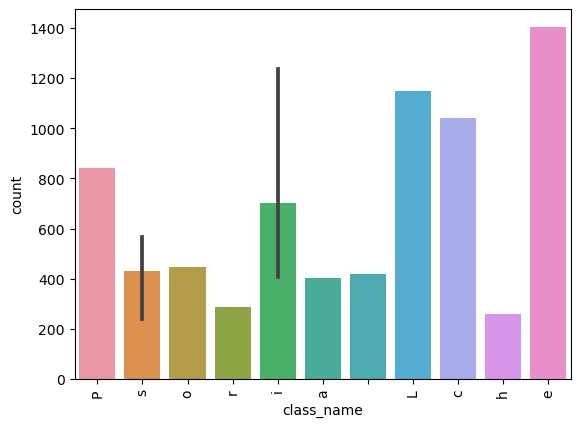

In [9]:
data_add = "C:/Users/krish/Hackathon/derment machine testing/train"
classes = []
for folder in os.listdir(data_add):
    if os.path.isdir(os.path.join(data_add, folder)):
        classes.append(folder)
print(classes)

num_classes = len(classes)
total = 0
all_count = []
class_name = []
proportions = []
data_path = pathlib.Path("C:/Users/krish/Hackathon/derment machine testing/train")
# Calculate total number of images and count images per class
for class_name in classes:
    count = len(list(data_path.glob(f"{class_name}/*.jpg")))
    total += count
    all_count.append(count)

# Calculate proportions and print information for each class
for i in range(num_classes):
    proportion = all_count[i] / total
    proportions.append(proportion)
    print("Class name = ", classes[i])
    print("count      = ", all_count[i])
    print("proportion = ", proportion)
    print("-------------------------------------")
print("total training image count = {} \n".format(total))

# Plotting
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns=['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

Initialised with 840 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Acne and Rosacea.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x472 at 0x25E59C99308>: 100%|██████████| 1500/1500 [00:06<00:00, 244.65 Samples/s]


Initialised with 489 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Atopic Dermatitis.

Processing <PIL.Image.Image image mode=RGB size=484x720 at 0x25E587BD908>: 100%|██████████| 1500/1500 [00:06<00:00, 240.96 Samples/s]                  


Initialised with 448 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Bullous Disease.

Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x25E58770B48>: 100%|██████████| 1500/1500 [00:06<00:00, 229.30 Samples/s]                  


Initialised with 288 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Cellulitis Impetigo, Bacterial Infection.

Processing <PIL.Image.Image image mode=RGB size=475x720 at 0x25E57D27388>: 100%|██████████| 1500/1500 [00:06<00:00, 226.41 Samples/s]                  


Initialised with 1235 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Eczema.

Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x25E59CAF488>: 100%|██████████| 1500/1500 [00:07<00:00, 194.27 Samples/s]                  


Initialised with 404 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Exanthems and Drug Eruptions.

Processing <PIL.Image.Image image mode=RGB size=720x598 at 0x25E558F1488>: 100%|██████████| 1500/1500 [00:08<00:00, 178.65 Samples/s]                  


Initialised with 239 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Hair Loss Alopecia, Hair Diseases.

Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x25E587C0A88>: 100%|██████████| 1500/1500 [00:08<00:00, 187.44 Samples/s]                  


Initialised with 405 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Herpes HPV and other STDs.

Processing <PIL.Image.Image image mode=RGB size=720x594 at 0x25E55D04F08>: 100%|██████████| 1500/1500 [00:07<00:00, 199.31 Samples/s]                  


Initialised with 568 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Light Diseases, Pigmentation Disorders.

Processing <PIL.Image.Image image mode=RGB size=720x487 at 0x25E587E9EC8>: 100%|██████████| 1500/1500 [00:07<00:00, 194.31 Samples/s]                  


Initialised with 420 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Lupus, Connective Tissue diseases.

Processing <PIL.Image.Image image mode=RGB size=720x485 at 0x25E5875D988>: 100%|██████████| 1500/1500 [00:07<00:00, 193.91 Samples/s]                  


Initialised with 1149 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Malignant Lesions.

Processing <PIL.Image.Image image mode=RGB size=464x720 at 0x25E5846CFC8>: 100%|██████████| 1500/1500 [00:07<00:00, 202.43 Samples/s]                  


Initialised with 463 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Melanoma Skin Cancer Nevi and Moles.

Processing <PIL.Image.Image image mode=RGB size=472x720 at 0x25E565B4E88>: 100%|██████████| 1500/1500 [00:07<00:00, 202.33 Samples/s]                  


Initialised with 1040 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Nail Fungus and other Nail Disease.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x480 at 0x25E565554C8>: 100%|██████████| 1500/1500 [00:07<00:00, 202.50 Samples/s]


Initialised with 260 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Poison Ivy, Contact Dermatitis.

Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x25E57601E08>: 100%|██████████| 1500/1500 [00:08<00:00, 174.98 Samples/s]                  


Initialised with 1405 image(s) found.
Output directory set to C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses\Psoriasis Lichen Planus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=479x720 at 0x25E593A15C8>: 100%|██████████| 1500/1500 [00:07<00:00, 199.06 Samples/s]


['Acne and Rosacea', 'Atopic Dermatitis', 'Bullous Disease', 'Cellulitis Impetigo, Bacterial Infection', 'Eczema', 'Exanthems and Drug Eruptions', 'Hair Loss Alopecia, Hair Diseases', 'Herpes HPV and other STDs', 'Light Diseases, Pigmentation Disorders', 'Lupus, Connective Tissue diseases', 'Malignant Lesions', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy, Contact Dermatitis', 'Psoriasis Lichen Planus']
Class name =  Acne and Rosacea
count      =  1500
proportion =  0.06666666666666667
-------------------------------------
Class name =  Atopic Dermatitis
count      =  1500
proportion =  0.06666666666666667
-------------------------------------
Class name =  Bullous Disease
count      =  1500
proportion =  0.06666666666666667
-------------------------------------
Class name =  Cellulitis Impetigo, Bacterial Infection
count      =  1500
proportion =  0.06666666666666667
-------------------------------------
Class name =  Eczema
count      =  15

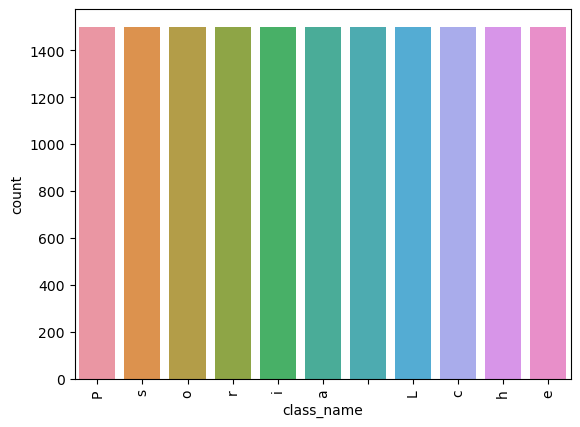

In [10]:
output_add = "C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses"
shutil.rmtree(output_add, ignore_errors=True)
os.makedirs(output_add)
for class_name in classes:
    source_directory = os.path.join(data_path, class_name)
    if not os.path.exists(source_directory):
        print(f"Warning: Source directory '{source_directory}' does not exist for class '{class_name}'. Skipping augmentation.")
        continue
    output_directory = os.path.join(output_add, class_name)
    p = Augmentor.Pipeline(source_directory, output_directory=output_directory)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1500)

classes = []
output_path = pathlib.Path("C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses")
for folder in os.listdir(output_add):
    if os.path.isdir(os.path.join(output_add, folder)):
        classes.append(folder)
print(classes)

num_classes = len(classes)
total = 0
all_count = []
class_name = []
proportions = []

for class_name in classes:
    count = len(list(output_path.glob(f"{class_name}/*.jpg")))
    total += count
    all_count.append(count)

# Calculate proportions and print information for each class
for i in range(num_classes):
    proportion = all_count[i] / total
    proportions.append(proportion)
    print("Class name = ", classes[i])
    print("count      = ", all_count[i])
    print("proportion = ", proportion)
    print("-------------------------------------")
print("total training image count = {} \n".format(total))

# Plotting
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns=['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [11]:
output_add = "C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses"

In [12]:
dataset_dir = output_add

compression_quality = 40

for class_folder in os.listdir(dataset_dir):
    class_folder_path = os.path.join(dataset_dir, class_folder)
    
    if os.path.isdir(class_folder_path):
        image_files = [filename for filename in os.listdir(class_folder_path) if filename.endswith((".jpg", ".jpeg"))]
        
        # Determine the number of images to compress (50% of the total)
        num_images_to_compress = int(len(image_files) * 0.5)
        
        # Randomly select a subset of images to compress
        images_to_compress = random.sample(image_files, num_images_to_compress)
        
        # Loop through the selected images and compress them
        for filename in images_to_compress:
            image_path = os.path.join(class_folder_path, filename)
            # Open the image
            image = Image.open(image_path)
            # Compress and save the image back to the class folder
            image.save(image_path, quality=compression_quality)

In [13]:
data_path = "C:/Users/krish/Hackathon/derment machine testing/AugmentedTrainingClasses"

In [14]:
test_path = 'C:/Users/krish/Hackathon/derment machine testing/test'

In [15]:
train_data = []
val_data = []

for folder in os.listdir(data_path):
  folder_path = os.path.join(data_path, folder)
  file = os.listdir(folder_path)
  num_train = int(0.8 * len(file))
  files_train = random.sample(file, num_train)
  files_val = list(set(file) - set(files_train))
   
  for file in files_train:
    file_path = os.path.join(folder_path, file)
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224,224))
    train_data.append((img, folder))
     
  for file in files_val:
    file_path = os.path.join(folder_path, file)
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224,224))
    val_data.append((img, folder))

In [16]:
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [17]:
# Convert lists to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

# Save the variables locally
np.save('C:/Users/krish/Hackathon/derment machine testing/lists/X_train1500.npy', X_train)
np.save('C:/Users/krish/Hackathon/derment machine testing/lists/X_val.npy1500', X_val)
np.save('C:/Users/krish/Hackathon/derment machine testing/lists/y_train_one_hot.npy1500', y_train_one_hot)
np.save('C:/Users/krish/Hackathon/derment machine testing/lists/y_val_one_hot.npy1500', y_val_one_hot)

# Save label encoder
with open('C:/Users/krish/Hackathon/derment machine testing/lists/label_encoder1500.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
#KAGGLE NOTEBOOK IMPLEMENTATION BELOW

In [5]:
X_train = np.load("C:/Users/krish/Hackathon/derment machine testing/lists/X_train1500.npy")
X_val = np.load("C:/Users/krish/Hackathon/derment machine testing/lists/X_val.npy1500.npy")
y_train_one_hot = np.load("C:/Users/krish/Hackathon/derment machine testing/lists/y_train_one_hot.npy1500.npy")
y_val_one_hot = np.load("C:/Users/krish/Hackathon/derment machine testing/lists/y_val_one_hot.npy1500.npy")

In [7]:
with open('C:/Users/krish/Hackathon/derment machine testing/lists/label_encoder1500.pkl', 'rb') as f:
    le = pickle.load(f)

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
num_classes = len(classes)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(600, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

ImportError: Loading a H5 file requires `h5py` to be installed.

In [ ]:
checkpoint_path = "C:/Users/krish/Hackathon/derment machine testing/LatestModelParameterTesting/augmented15classes.h5"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                            save_weights_only=False,
                                            save_best_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            verbose=1)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 1024
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                   epochs = EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpoint_callback])

In [ ]:
#Loss Graph
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Accuracy Graph
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss,label='Training accuracy', marker='o')
plt.plot(epochs, val_loss,label='Validation accuracy', marker='o')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
pip install tensorflow==2.15.0

In [9]:
import keras

ModuleNotFoundError: No module named 'tensorflow.compat'

In [8]:
model = keras.models.load_model("C:/Users/krish/Hackathon/derment machine testing/LatestModelParameterTesting/classes15100050.h5") 

NameError: name 'keras' is not defined

In [ ]:
folder_path

In [ ]:
real_label = []
predicted_class = []
file_path = os.path.join(folder_path, file)

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])


In [ ]:
conf_matrix = confusion_matrix(real_label, predicted_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
accuracy = accuracy_score(real_label, predicted_class)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()